# LOAD DATA

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    path = "../data/indonesia_transactions_raw.csv"
    df = pd.read_csv(path, delimiter=',')
except Exception as e:
    print(e)

In [3]:
df.head()

,transaction_id,timestamp,customer_id,account_number,merchant_id,merchant_name,merchant_category,mcc,amount_idr,currency,customer_lat,customer_lon,merchant_lat,merchant_lon,bank_branch,fraud_probability,fraud_type,fraud_pattern,device_id
0,d07860fd-f022-4ec0-8b0b-951bd0bd3644,2025-05-11 15:39:20.639360,C00000486,HGQX68867983917330,M0000227,UD Mandasari Novitasari,Electronics,5946,46693,IDR,-10.979114,96.613478,-10.618634,103.374836,BRI_DPS_007,0.0,NaN,NaN,NaN
1,bee1c753-3d35-409f-9a87-ae9be3240b98,2025-05-11 15:53:20.639360,C00002067,HSSF56511740815022,M0000774,PT Zulkarnain Tbk,Electronics,5946,100898,IDR,-1.089395,101.798148,2.626244,107.319984,BRI_JKT_001,0.0,NaN,NaN,NaN
2,2458839a-e386-431e-a465-14b4ad383936,2025-05-11 17:42:20.639360,C00004383,NOWI35237540368683,M0000260,CV Suryono Mulyani (Persero) Tbk,Retail,5311,51470,IDR,-6.820328,113.167446,-1.395138,124.277380,BCA_JKT_112,0.0,NaN,NaN,NaN
3,18ca30f4-5167-438a-bcdf-dc2ecde5bbce,2025-05-11 19:24:20.639360,C00001960,TLOZ00735811428398,M0000420,CV Putra,F&B,5499,330320,IDR,-3.628634,123.004039,-2.180501,99.567842,BRI_BDG_078,0.0,NaN,NaN,NaN
4,6a07a541-0180-4cae-b3fa-994e7da4878a,2025-05-11 20:01:20.639360,C00001375,NZBP98993166838759,M0000774,PT Zulkarnain Tbk,Electronics,5946,339169,IDR,5.345692,114.376941,2.626244,107.319984,BRI_BDG_012,0.0,NaN,NaN,NaN


# Check ratio fraud and normal transactions

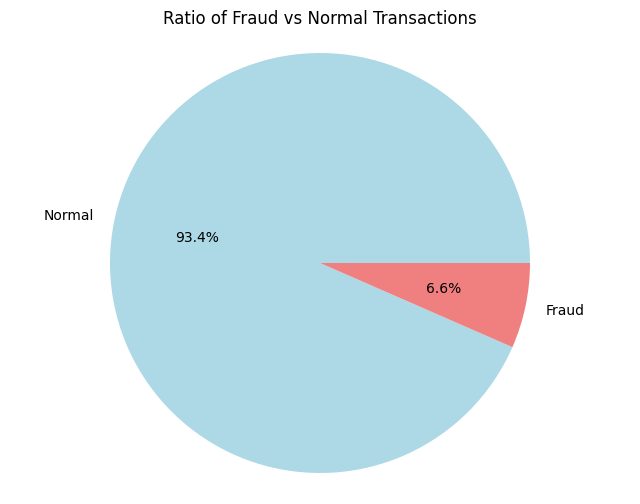


Total Transactions: 129,091
Normal Transactions: 120,618 (93.4%)
Fraud Transactions: 8,473 (6.6%)


In [4]:
# Calculate fraud ratio
fraud_mask = df['fraud_probability'] > 0
fraud_count = fraud_mask.sum()
total_count = len(df)
normal_count = total_count - fraud_count

# Calculate percentages
fraud_percent = (fraud_count / total_count) * 100
normal_percent = (normal_count / total_count) * 100

labels = ['Normal', 'Fraud']
sizes = [normal_percent, fraud_percent]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Ratio of Fraud vs Normal Transactions')
plt.axis('equal')
plt.show()

print(f"\nTotal Transactions: {total_count:,}")
print(f"Normal Transactions: {normal_count:,} ({normal_percent:.1f}%)")
print(f"Fraud Transactions: {fraud_count:,} ({fraud_percent:.1f}%)")

## Kind of fraud

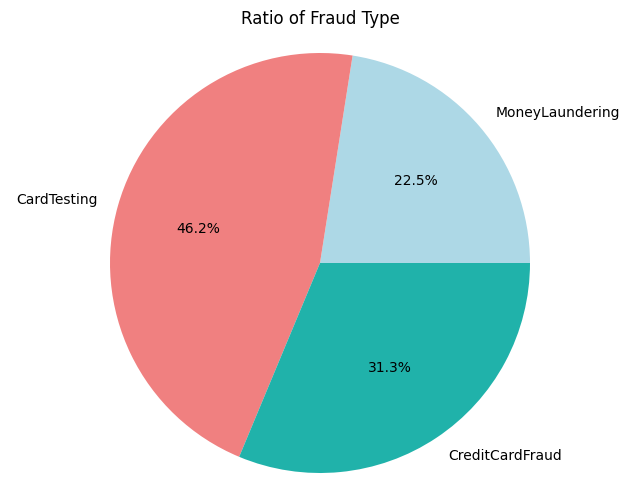

MoneyLaundering Fraud: 1908 (22.5 %)
CardTesting Fraud: 3914 (46.2 %)
CreditCardFraud Fraud: 2651 (31.3 %)


In [5]:
fraud_type = df['fraud_type'].dropna().unique()

fraud_dict = {}
for i in fraud_type:
    fraud_dict[i] = int(df[df['fraud_type'] == i]['fraud_type'].count())

sizes = []
for i in fraud_dict:
    sizes.append((fraud_dict[i]/fraud_count) * 100)


colors = ['lightblue', 'lightcoral', 'lightseagreen']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=fraud_type, colors=colors, autopct='%1.1f%%')
plt.title('Ratio of Fraud Type')
plt.axis('equal')
plt.show()

for idx, type in enumerate(fraud_dict):
    print(f'{type} Fraud: {fraud_dict[type]}', f'({sizes[idx]:.1f} %)')

In [6]:
# Get all fraud transactions
fraud_df = df[df['fraud_pattern'] == 'NewDevice']

# Count occurrences of each customer_id
customer_counts = fraud_df['customer_id'].value_counts()

# Get customers with multiple fraud transactions
repeated_customers = customer_counts[customer_counts > 1]

print(f"Number of customers with multiple fraud transactions: {len(repeated_customers)}")
print("\nCustomers with multiple fraud transactions:")
print(repeated_customers)
print("\nPercentage of fraud customers with multiple transactions: {:.2f}%"
    .format(len(repeated_customers) / len(fraud_df['customer_id'].unique()) * 100))

Number of customers with multiple fraud transactions: 75

Customers with multiple fraud transactions:
customer_id
C00004494    3
C00001678    3
C00003453    3
C00002168    3
C00004114    3
            ..
C00001203    2
C00003535    2
C00004223    2
C00004437    2
C00003080    2
Name: count, Length: 75, dtype: int64

Percentage of fraud customers with multiple transactions: 9.26%


In [7]:
new_device_customers = df[df['fraud_pattern'] == 'NewDevice']['customer_id'].unique()
count_customer_new_device = {}
for customer in df[df['fraud_pattern'] == 'NewDevice']['customer_id']:
    count_customer_new_device[customer] = count_customer_new_device.get(customer, 0) + 1
print(count_customer_new_device)
print(f"Number of unique customers with NewDevice fraud: {len(new_device_customers)}")
print("\nCustomer IDs:")
print(new_device_customers)

{'C00000184': 1, 'C00004460': 1, 'C00004215': 1, 'C00001657': 1, 'C00003990': 1, 'C00004772': 1, 'C00002171': 1, 'C00004920': 1, 'C00004668': 1, 'C00002997': 1, 'C00003677': 1, 'C00002940': 1, 'C00000583': 2, 'C00001695': 1, 'C00002294': 1, 'C00003842': 1, 'C00003923': 1, 'C00002307': 1, 'C00003235': 1, 'C00003843': 1, 'C00003253': 1, 'C00004690': 1, 'C00002658': 1, 'C00000953': 1, 'C00000148': 1, 'C00000800': 1, 'C00004788': 1, 'C00003708': 1, 'C00002199': 1, 'C00004362': 2, 'C00001577': 1, 'C00000887': 1, 'C00002806': 2, 'C00000868': 1, 'C00001836': 1, 'C00002429': 1, 'C00004871': 1, 'C00003667': 1, 'C00004848': 1, 'C00002713': 1, 'C00003870': 1, 'C00003818': 1, 'C00003057': 1, 'C00004031': 1, 'C00003788': 2, 'C00003512': 1, 'C00002205': 1, 'C00004663': 1, 'C00004139': 1, 'C00001681': 1, 'C00004530': 1, 'C00000285': 1, 'C00000253': 1, 'C00004263': 1, 'C00004712': 1, 'C00001961': 1, 'C00004269': 1, 'C00002867': 1, 'C00003400': 2, 'C00004061': 1, 'C00000813': 1, 'C00002222': 2, 'C00002